In [1]:
#importing the libraries for the notebook

import matplotlib.pyplot as plt
import cv2
import numpy as np

**Question 1 : Contrast strecthing for the lab**

**Note :: The file chould be in the same directory as that of the python notebook and the name should be 

**cat.png**

**Following is the list of the files created**

1. contrast_image -> for contrast strectching

2. Mean_Filter_Image -> for mean filtering
3. Median_Filter_Image -> for median filtering

4. Lab_Sobel_x -> for creating Sobel x gradient with my function
5. CV_Sobel_X -> Sobel_x gradient using the CV sobel library

6. Lab_Sobel_y -> for creating Sobel y gradient using my function
7. CV_Sobel_y -> Sobel_y gradient using the CV sobel library

In [2]:
#Question 1 of the Lab assignment - Contrast Stretching

#reading the image and displaying the original
q1_input = cv2.imread("cat.png",cv2.IMREAD_GRAYSCALE)

#plt.imshow(cv2.cvtColor(q1_input, cv2.COLOR_BGR2RGB))
#plt.show()

In [3]:
#now attempting to contrast stretch the image
#now we have to use the formula given the lab specs
# using numpy and dot product, we can perform this operation.

#Note another benefit of matplot is that it gives a scale that helps in estimation

#getting the values for the formula of contrast



a = 0
b = 255

c = np.min(q1_input).astype(np.uint8)
d = np.max(q1_input).astype(np.uint8)

#using the formula for given in the Lab 
contrast_image = np.dot( (q1_input - c),(b-a)/(d-c) + a)

#saving the image
cv2.imwrite('contrast_image.jpg',contrast_image)

contrast_image = contrast_image.astype('uint8')

#show the image
#plt.imshow(cv2.cvtColor(contrast_image,cv2.COLOR_BGR2RGB))



**Question 2 : Histograms for the image**

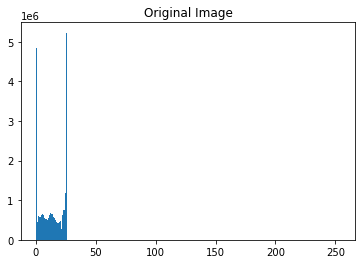

In [4]:
#Question 2 for the Lab 
#Plotting the histograms of the image and checking them

count_values = [ i for i in range(0,255)]

plt.hist(q1_input.ravel(),count_values)
plt.title("Original Image")
plt.show()

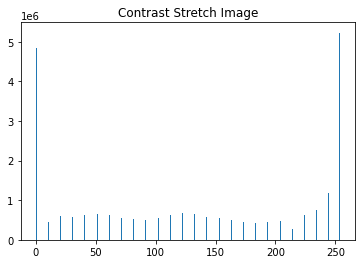

In [5]:
count_values = [ i for i in range(0,255)]

plt.hist(contrast_image.ravel(),count_values)
plt.title("Contrast Stretch Image")
plt.show()

**Question 3 : Filters for the lab**

In [6]:
#Question 3 of the Lab

#first padding the image 
padded_image = np.pad(contrast_image,(1,1),'edge')

#getting the dimensions of the contrast image
dim = contrast_image.shape

#this is the mean filter output image
q3_output_image = np.zeros(dim)

In [7]:

def cv_filter_convolution(output, contrast_image,padded_image,val_switch):
    
    for y in range(1,contrast_image.shape[1]):
        for x in range(1,contrast_image.shape[0]):
            
            if val_switch == 'mean':
                output[x,y] = int(np.mean(padded_image[x-1:x+2,y-1:y+2]))
            elif val_switch == 'median' :
                output[x,y] = int(np.median(padded_image[x-1:x+2,y-1:y+2]))
    
    return output 
                
    

In [8]:
q3_output_image = cv_filter_convolution(q3_output_image,contrast_image, padded_image,val_switch = 'mean')

In [9]:
q3_output_image = q3_output_image.astype('uint8')

#show the image
#plt.imshow(cv2.cvtColor(q3_output_image,cv2.COLOR_BGR2RGB))

#mean filter image
cv2.imwrite('Mean_Filter_Image.jpg',q3_output_image)

True

In [10]:
# performing the median filter to the image
q3_median_output_image = np.zeros(dim)

q3_median_output_image = cv_filter_convolution(q3_median_output_image,contrast_image, padded_image,val_switch = 'median')

In [11]:
#the median output of the image 
q3_median_output_image = q3_median_output_image.astype('uint8')

#show the image
#plt.imshow(cv2.cvtColor(q3_median_output_image,cv2.COLOR_BGR2RGB))

#saving the image
cv2.imwrite('Median_Filter_Image.jpg',q3_median_output_image)

True

**Question 4 : Sobel Operator for computing gradients**

In [12]:
#Now we will begin with the question 4

f_x = np.array ((
                [-1,0,1],
                [-2,0,2],
                [-1,0,1],
))


f_y = np.array((
        [-1,-2,-1],
        [0,0,0],
        [1,2,1],
))

In [13]:
#padding the output image before convulation this is the output of the median
padded_image = np.pad(q3_median_output_image,(1,1),'edge')


q4_output = np.zeros(q3_median_output_image.shape)


#for Sobel x and Sobel y

val_x = np.zeros(q3_median_output_image.shape)
val_y = np.zeros(q3_median_output_image.shape)

In [14]:
def Sobel_function(output, kernel,padded_image,contrast_image):
    
    for y in range(1,contrast_image.shape[1]):
        for x in range(1,contrast_image.shape[0]):
            output[x,y] = (kernel * padded_image[x-1:x+2,y-1:y+2]).sum()
    
    return output
    

In [15]:
val_x = Sobel_function(val_x,f_x,padded_image,contrast_image)

In [16]:
# Sobel image for the x axis

cv2.imwrite('Lab_Sobel_x.jpg',val_x)

True

In [17]:
#now executing the Sobel for x axis via the cv2 library
grad_x = cv2.Sobel(q3_median_output_image,cv2.CV_64F,1,0,ksize=3)

cv2.imwrite('CV_Sobel_x.jpg',grad_x)

True

In [18]:
val_y = Sobel_function(val_y,f_y,padded_image,contrast_image)

In [19]:
#Saving the file
cv2.imwrite('Lab_Sobel_y.jpg',val_y)

True

In [20]:
#now executing the Sobel via the cv2 libary

grad_y = cv2.Sobel(q3_median_output_image,cv2.CV_64F,0,1,ksize=3)

In [21]:
cv2.imwrite('CV_Sobel_y.jpg',grad_y)

True